In [2]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

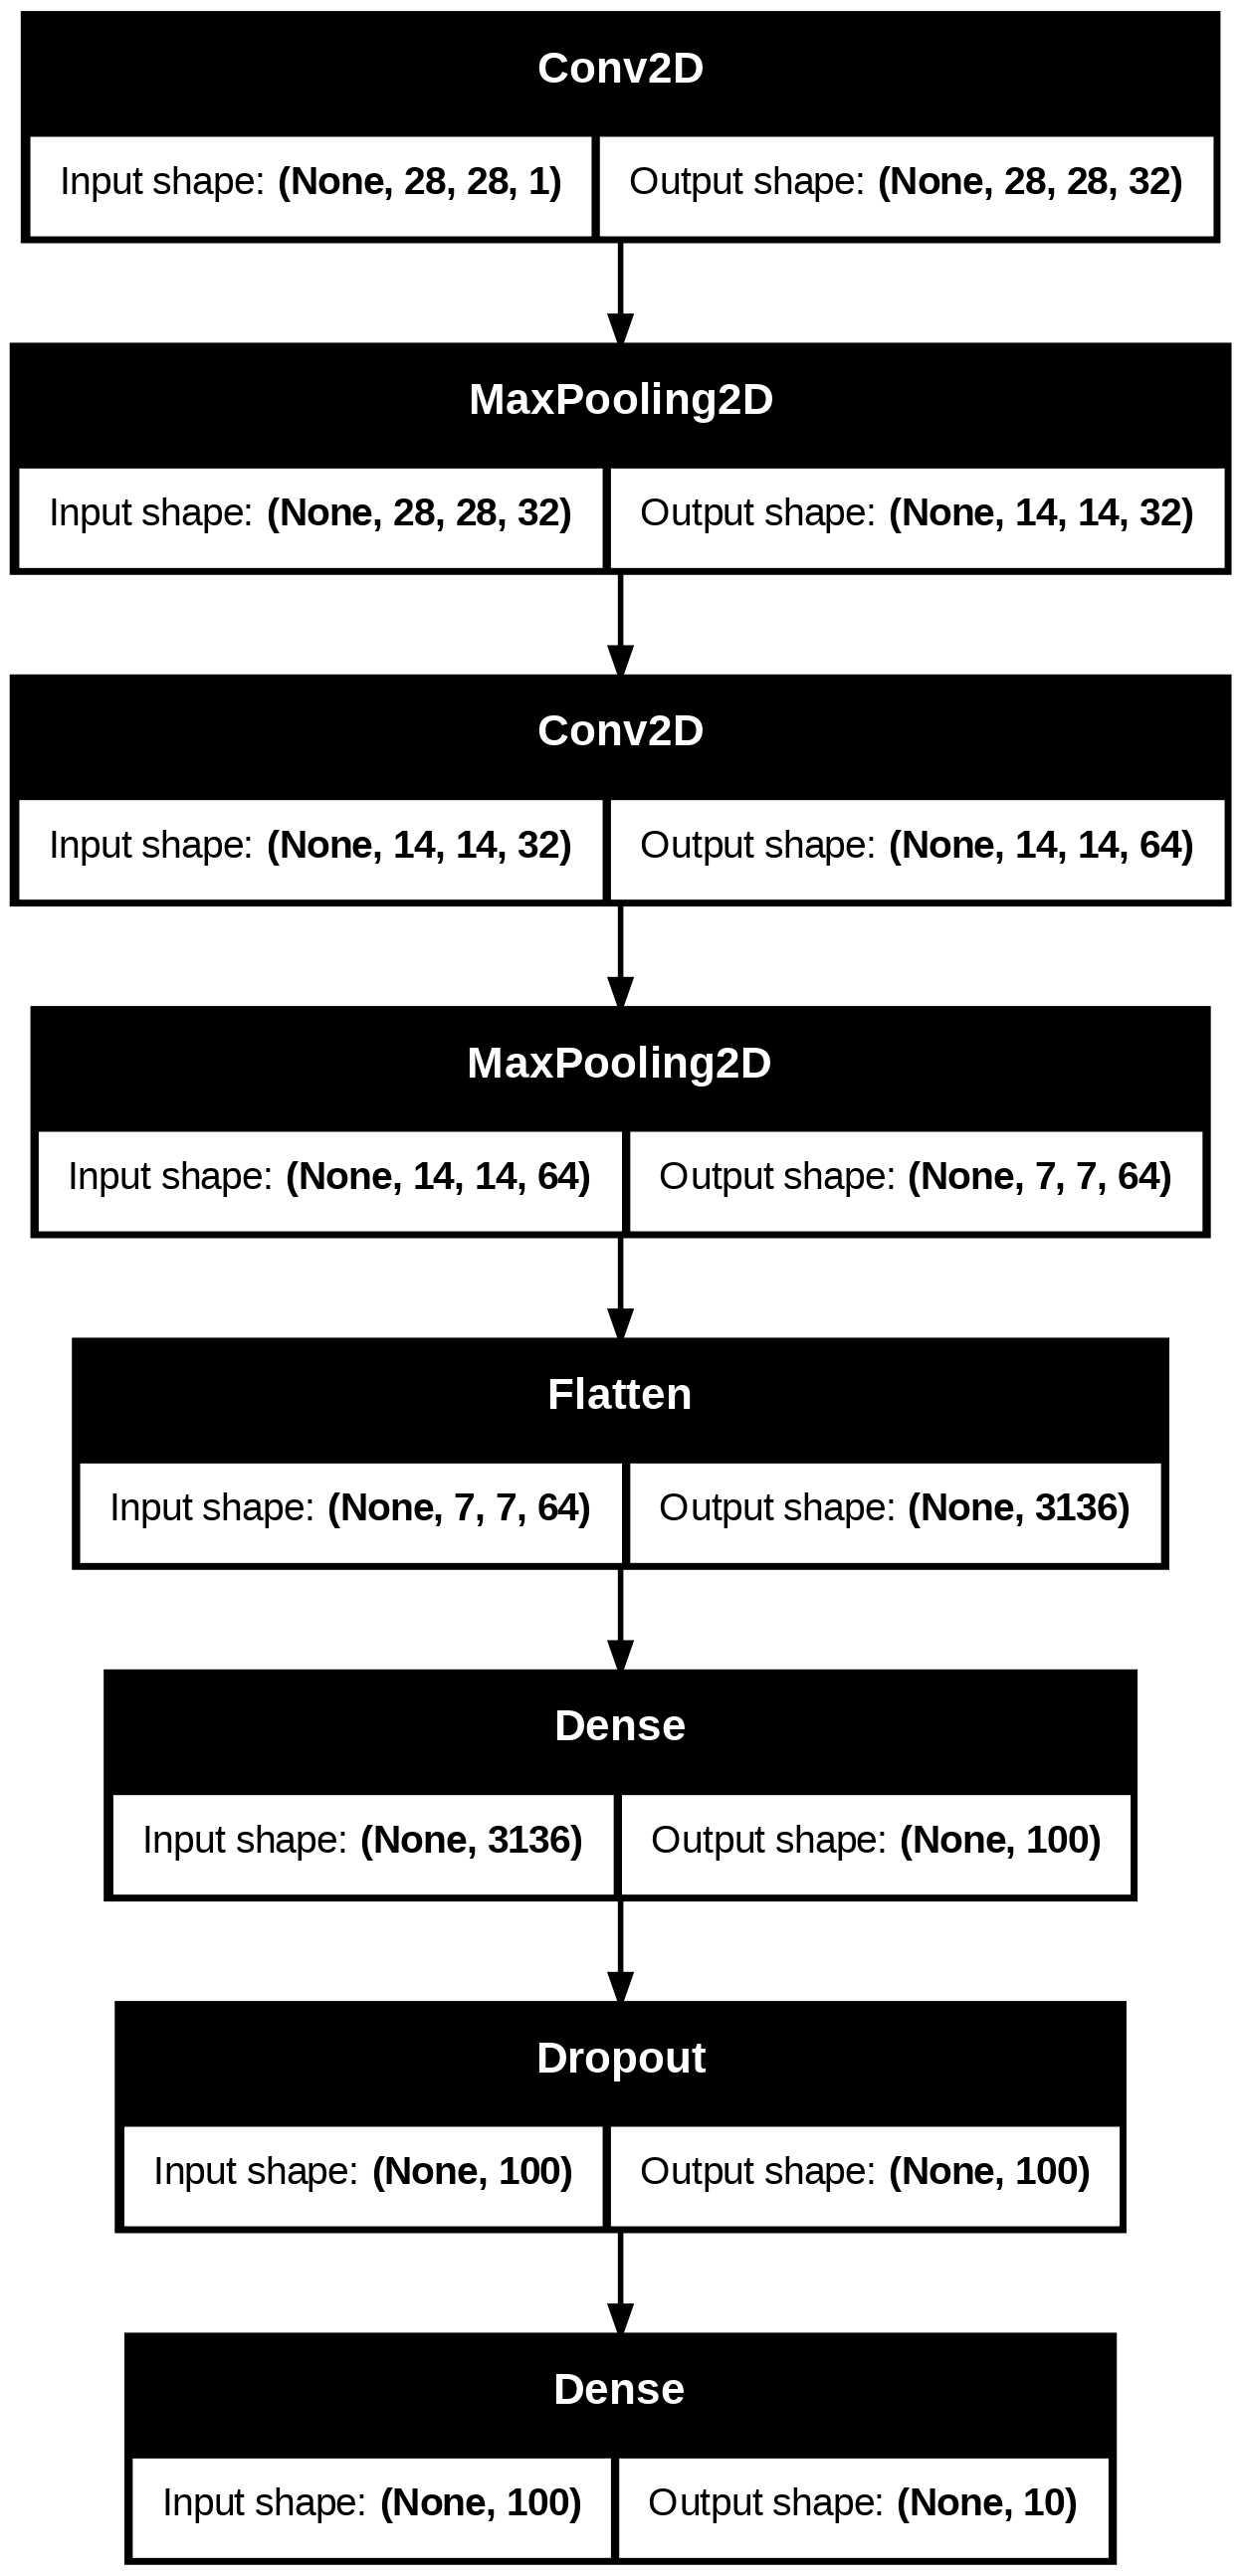

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7471 - loss: 0.7062

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7475 - loss: 0.7053 - val_accuracy: 0.8812 - val_loss: 0.3232
Epoch 2/20
1484/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8729 - loss: 0.3554

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8729 - loss: 0.3552 - val_accuracy: 0.8928 - val_loss: 0.2861
Epoch 3/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8893 - loss: 0.3028

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8894 - loss: 0.3027 - val_accuracy: 0.9066 - val_loss: 0.2488
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9023 - loss: 0.2649

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9023 - loss: 0.2649 - val_accuracy: 0.9112 - val_loss: 0.2413
Epoch 5/20
1487/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.2435

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9107 - loss: 0.2434 - val_accuracy: 0.9125 - val_loss: 0.2324
Epoch 6/20
1486/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9175 - loss: 0.2209

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9175 - loss: 0.2209 - val_accuracy: 0.9130 - val_loss: 0.2324
Epoch 7/20
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9247 - loss: 0.2043

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9247 - loss: 0.2043 - val_accuracy: 0.9152 - val_loss: 0.2319
Epoch 8/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9278 - loss: 0.1875

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9278 - loss: 0.1875 - val_accuracy: 0.9180 - val_loss: 0.2291
Epoch 9/20
1483/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9380 - loss: 0.1679

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9380 - loss: 0.1679 - val_accuracy: 0.9191 - val_loss: 0.2444
Epoch 10/20
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9412 - loss: 0.1553

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9412 - loss: 0.1553 - val_accuracy: 0.9218 - val_loss: 0.2336


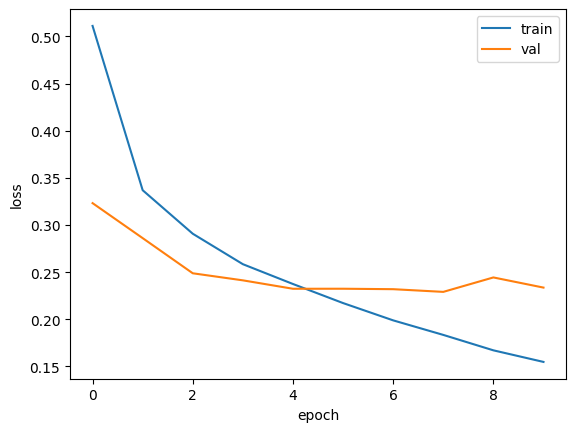

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9184 - loss: 0.2224


[0.22905497252941132, 0.9179999828338623]

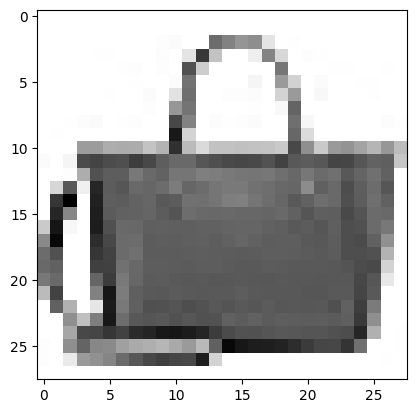

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [13]:
import numpy as np
preds = model.predict(val_scaled[0:1])
print(preds)
print(np.argmax(preds))
print(val_target[0:1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
[[1.1354785e-19 3.2659660e-30 4.2823945e-25 8.2004937e-23 7.9624283e-22
  4.5282591e-23 4.0394875e-23 3.4422827e-20 1.0000000e+00 2.7102566e-23]]
8
[8]


In [14]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [15]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [16]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())
print(conv_weights[:,:,:5])

-0.01784411 0.2551265
[[[[ 2.97022671e-01  6.25951365e-02 -8.02270100e-02  2.67742842e-01
    -2.80961484e-01  9.76679474e-02  1.15883380e-01 -2.33912766e-01
     4.39394973e-02  1.31325543e-01 -1.70146942e-01  2.04296727e-02
     1.09370917e-01  2.39758372e-01  2.19502285e-01  7.94816315e-02
    -2.81352580e-01 -1.43430769e-01  1.04624644e-01 -8.14127922e-02
    -7.01753795e-02  5.65166287e-02  2.13077083e-01 -1.87950552e-01
     3.01659256e-01 -1.25840616e+00  8.85331556e-02  1.57647684e-01
     3.04806847e-02 -9.36691687e-02 -1.01421759e-01  2.19678864e-01]]

  [[-2.43926451e-01 -1.62436459e-02 -6.01754151e-03 -2.74193794e-01
     7.77939660e-03 -1.61530107e-01  7.61929750e-02  1.34111136e-01
    -2.40740284e-01  1.89119935e-01  5.16512617e-02 -4.82385367e-01
     2.67859012e-01  8.82439539e-02  2.40780279e-01 -1.63717121e-01
    -2.29103073e-01  1.98157365e-03  1.23507239e-01  1.64549127e-01
    -5.13048470e-01 -2.43918538e-01  2.44033396e-01  1.94095016e-01
     6.88704401e-02  2.

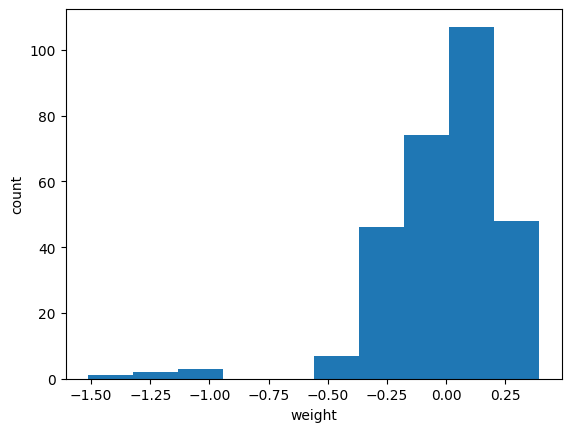

In [17]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

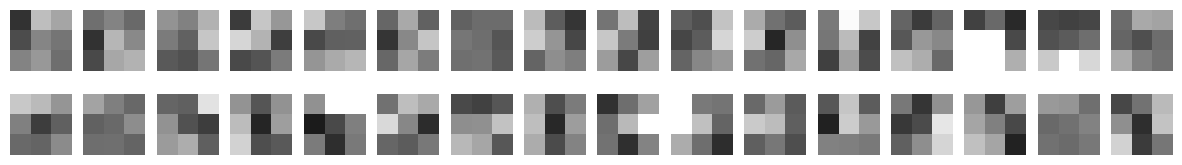

In [26]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16+j], cmap='gray_r', vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [19]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)
no_training_conv_weights = no_training_conv.weights[0].numpy()
print(no_training_conv_weights.mean(), no_training_conv_weights.std())

(3, 3, 1, 32)
0.0053191613 0.08463709


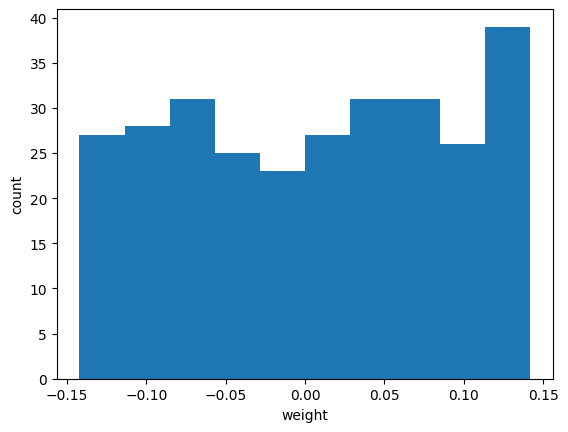

In [21]:
plt.hist(no_training_conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

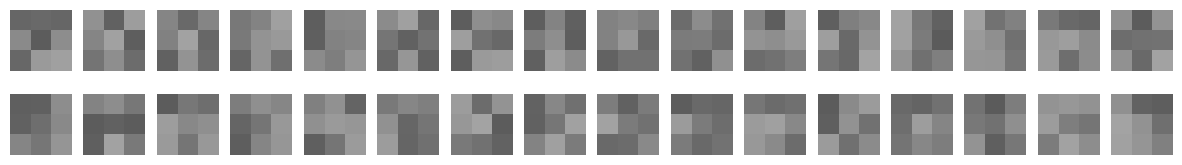

In [24]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_conv_weights[:,:,0,i*16+j], cmap='gray_r', vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')

plt.show()

In [27]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor>]


In [28]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

In [30]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [48]:
inputs = keras.Input(shape=(784,))
hidden = dense1(inputs)
outputs = dense2(hidden)

# inputs = keras.Input(train_input[0])
hidden = dense1(train_input[0].reshape(-1, 28*28))
outputs = dense2(hidden)
print(outputs)

tf.Tensor(
[[0.1738794  0.03296126 0.11271054 0.13187122 0.01681722 0.0420259
  0.11192531 0.0705805  0.20302677 0.10420188]], shape=(1, 10), dtype=float32)


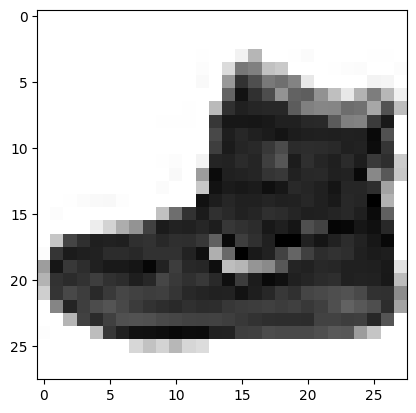

In [37]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [38]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
(1, 28, 28, 32)


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


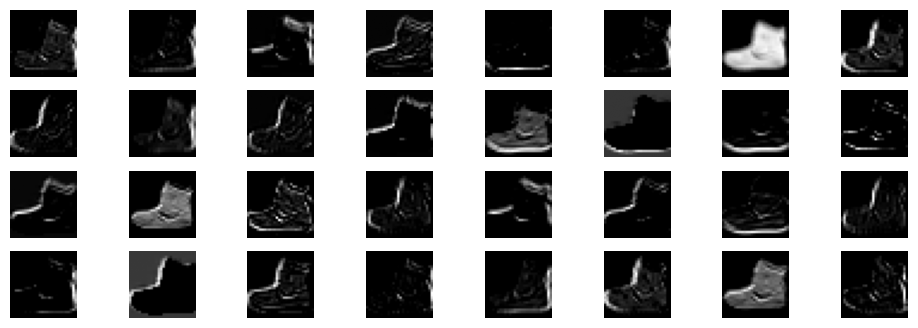

In [39]:
fig, ax = plt.subplots(4, 8, figsize=(12, 4))
for i in range(4):
  for j in range(8):
    ax[i, j].imshow(feature_maps[0, :, :, i*8+j], cmap='gray')
    ax[i, j].axis('off')
plt.show()

In [49]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1,28,28,1)/255.0)
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


(1, 14, 14, 64)


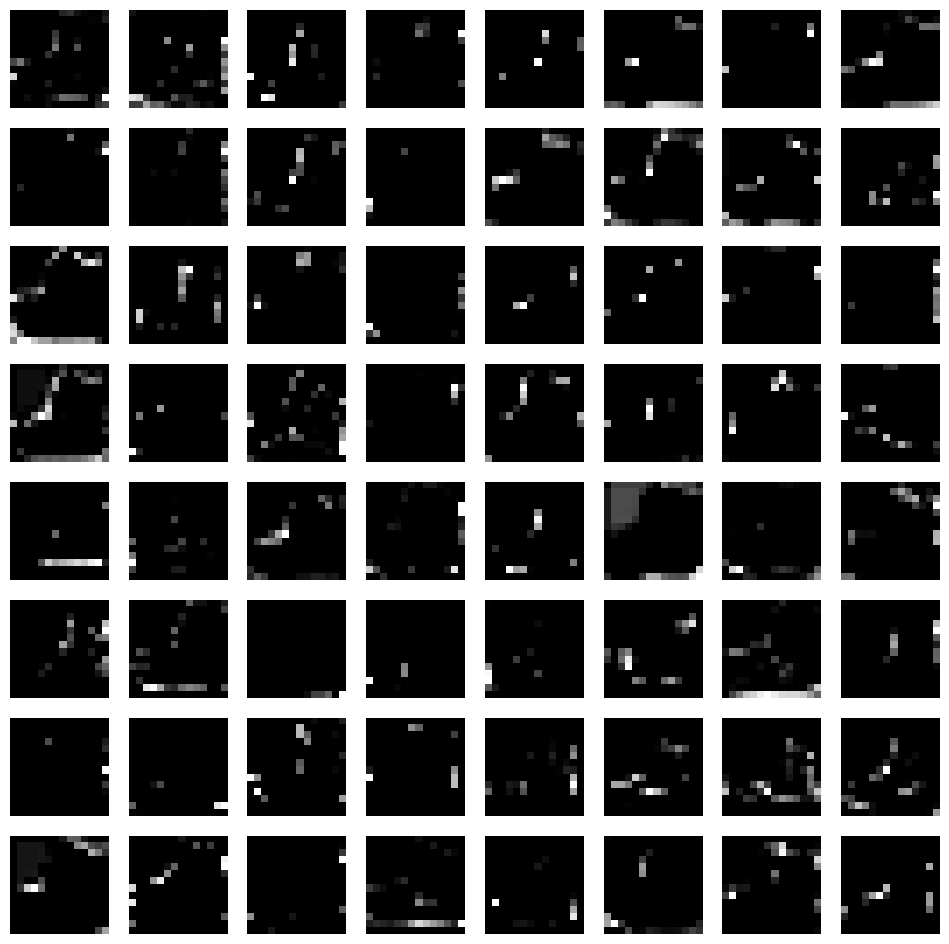

In [50]:
fig, ax = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    ax[i, j].imshow(feature_maps[0, :, :, i*8+j], cmap='gray')
    ax[i, j].axis('off')
plt.show()